**Introduction:**

This notebook shows how the Angular Correlation and FEM data was analyzed.  Much of the work was done using Empyer, a python package based on hyperspy which preforms angular correlation and FEM analysis from 4-d datasets. Much of the documentation there shows more indepth explination as to how (and what) calculations were preformed.  This notebook shows more the analysis and different processes applied to each dataset.  For reproducing the analysis below download the data set from (download_link).

In [1]:
import glob
import empyer
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import struct
import hyperspy.api as hs
%matplotlib notebook

In [2]:
# For reproducing the date replace with the downloaded data replace the directory names with the names on your
# computer
directory24 = '/srv/home/csfrancis/ZrCuAl/Zr65Cu27.5Al7.5(HH)_HighT/ZrCuAl(HH)3-28-2017_50W_3.8mT_170C_78s(0.24nmpsec)/hdf5_files'
directory83 = '/srv/home/csfrancis/ZrCuAl/Zr65Cu27.5Al7.5(HH)_HighT/ZrCuAl(HH)4-16-2018_175W_3.8mT_175C_25s(0.83nmpsec)/hdf5_files' 
directory119 = '/srv/home/csfrancis/ZrCuAl/Zr65Cu27.5Al7.5(HH)_HighT/ZrCuAl(HH)3-28-2018_300W_3.8mT_170C_13s(1.19nmpsec)/hdf5'
# loading just the angular Correlations
ang_files119 = np.array(glob.glob(directory119 + '/*angular.hdf5'))
ang_files83 = np.array(glob.glob(directory83 + '/*angular.hdf5'))
ang_files24 = np.array(glob.glob(directory24  + '/*angular.hdf5'))
pos1 = glob.glob(directory119  + '/*pos01.hdf5')

In [3]:
# Loading Polar Spectrum to make sure that the images are properly registered.
# The '%' is jupyter magic and is for changing how graphics are shown in python
%matplotlib inline
pol_files119 = np.array(glob.glob(directory119 + '/*polar.hdf5'))
pol_files83 = np.array(glob.glob(directory83 + '/*polar.hdf5'))
pol_files24 = np.array(glob.glob(directory24  + '/*polar.hdf5'))
polar24 = hs.stack([empyer.load(file).isig[:,2.5:8.0] for file in pol_files24]);
polar83 = hs.stack([empyer.load(file).isig[:,2.5:8.0] for file in pol_files83]);
polar119 = hs.stack([empyer.load(file).isig[:,2.5:8.0] for file in pol_files119]);
polar24.set_signal_type("PolarSignal")
polar83.set_signal_type("PolarSignal")
polar119.set_signal_type("PolarSignal")
polar24.mask_below(1)
polar83.mask_below(1)
polar119.mask_below(1)

polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!
polar_signal  loaded!


The figure below shows an example of a polar unwrapped samples.

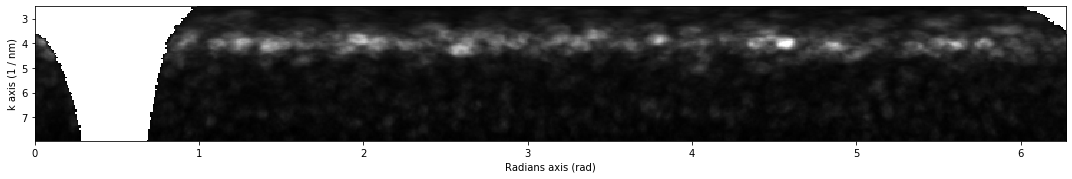

In [4]:
#Visualizing some of the data...
f = plt.figure(figsize=(15,3))
hs.plot.plot_images(polar119.inav[0,0,1:2], aspect= .15, axes_decor="on", label=None, per_row =2,colorbar=False,tight_layout=True, fig= f)
plt.show()

The intensity of these polar spectrums is normalized when the angular correlation is taken. For example, if we take the above image and multiply the intensity by 2 the resulting angular correlation is unchanged

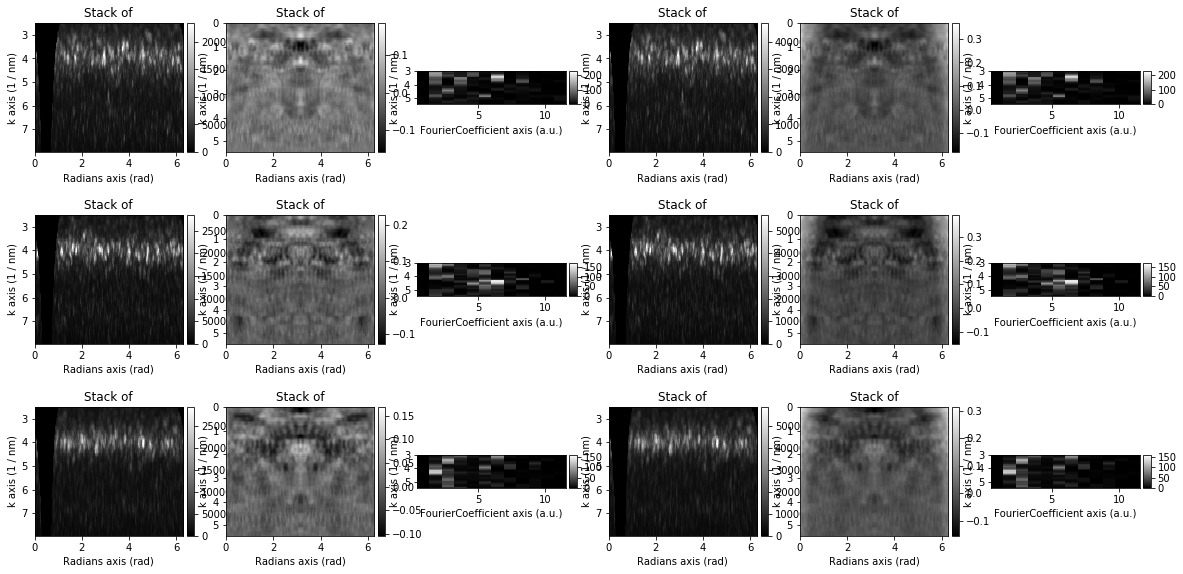

In [5]:
hs.preferences.General.show_progressbar=False
f = plt.figure(figsize=(20,10))

images = [polar24.inav[0,0,1],
          polar24.inav[0,0,1].autocorrelation(),
          polar24.inav[0,0,1].autocorrelation().get_power_spectrum().isig[0:12,3.0:],
          (polar24.inav[0,0,1]*2),
          (polar24.inav[0,0,1]*2).autocorrelation(),
          (polar24.inav[0,0,1]*2).autocorrelation().get_power_spectrum().isig[0:12,3.0:],
          polar83.inav[0,0,1],
          polar83.inav[0,0,1].autocorrelation(),
          polar83.inav[0,0,1].autocorrelation().get_power_spectrum().isig[0:12,3.0:],
          (polar83.inav[0,0,1]*2),
          (polar83.inav[0,0,1]*2).autocorrelation(),
          (polar83.inav[0,0,1]*2).autocorrelation().get_power_spectrum().isig[0:12,3.0:],
          polar119.inav[0,0,1],
          polar119.inav[0,0,1].autocorrelation(),
          polar119.inav[0,0,1].autocorrelation().get_power_spectrum().isig[0:12,3.0:],
          (polar119.inav[0,0,1]*2),
          (polar119.inav[0,0,1]*2).autocorrelation(),
          (polar119.inav[0,0,1]*2).autocorrelation().get_power_spectrum().isig[0:12,3.0:]]         
hs.plot.plot_images(images,
                    per_row=6,
                    aspect=1,
                    fig=f)
plt.show()

In [6]:
# preforming the angular correlation on the three datasets
polar24.mask_below(1)
polar83.mask_below(1)
polar119.mask_below(1)
ang24 = polar24.autocorrelation()
ang83 = polar83.autocorrelation()
ang119 = polar119.autocorrelation()

In [7]:
ang24.axes_manager.signal_axes[1].offset=2.507
ang83.axes_manager.signal_axes[1].offset=2.507
ang119.axes_manager.signal_axes[1].offset=2.507

In [8]:
pow24=ang24.mean(axis=(0,1)).get_power_spectrum()
pow83=ang83.mean(axis=(0,1)).get_power_spectrum()
pow119=ang119.mean(axis=(0,1)).get_power_spectrum()

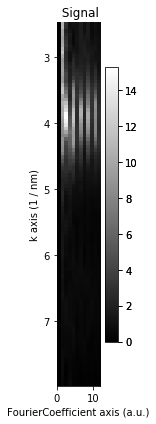

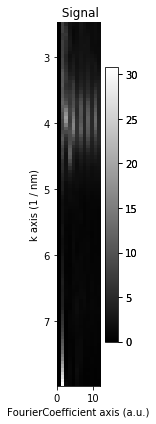

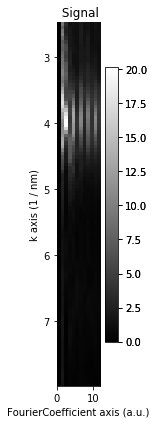

In [9]:
pow24.mean(axis=0).isig[0:12].plot()
pow83.mean(axis=0).isig[0:12].plot()
pow119.mean(axis=0).isig[0:12].plot()

In [10]:
mean24 = pow24.mean(axis=0)
mean83 = pow83.mean(axis=0)
mean119 = pow119.mean(axis=0)
std24 = pow24.std(axis=0)/np.sqrt(10)
std83 = pow83.std(axis=0)/np.sqrt(10)
std119 = pow119.std(axis=0)/np.sqrt(10)

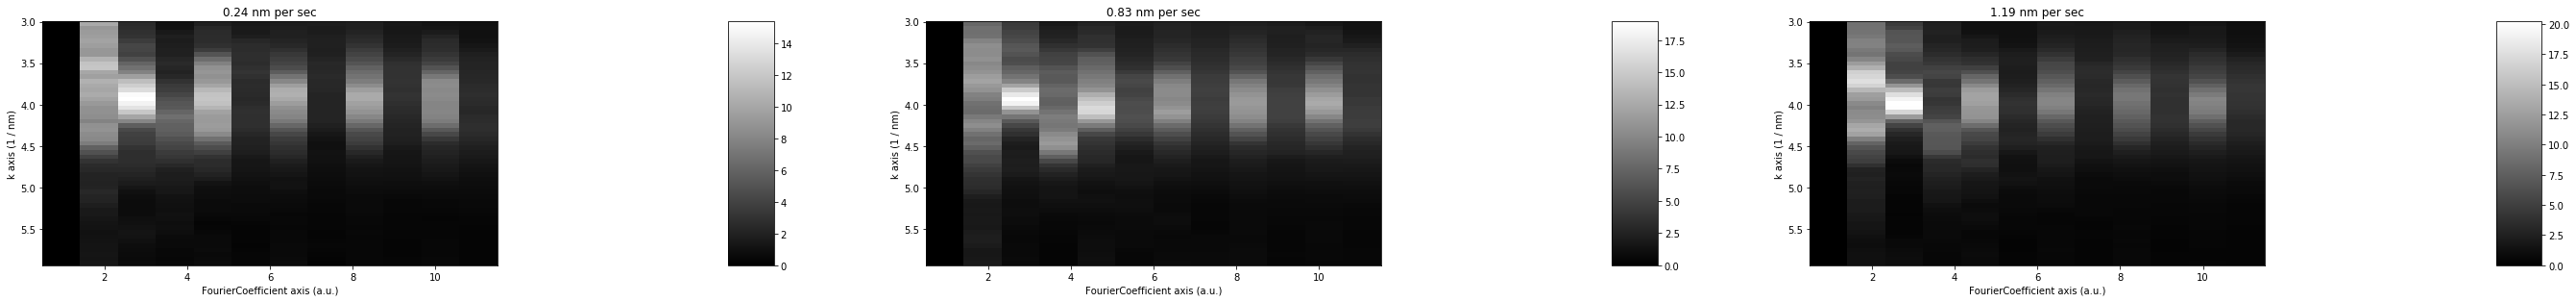

In [11]:
f = plt.figure(figsize=(40,10))
hs.plot.plot_images([mean24.isig[0:12,3.0:6.0],mean83.isig[0:12,3.0:6.0],mean119.isig[0:12,3.0:6.0]],
                    aspect=2,fig=f, per_row=3, padding={"top":2}, tight_layout=True,
                    label = ["0.24 nm per sec","0.83 nm per sec","1.19 nm per sec"])
plt.show()

In [12]:
def get_range(signal):
    x = signal.axes_manager.signal_axes[0]
    return(np.linspace(x.offset,x.offset+x.size*x.scale,x.size))

In [25]:
def plot_subplot(axis, n, twenty,twentyerr, eighty,eightyerr, hundred, hundrederr,ylim=25, xlim=5.5):
    x = get_range(twenty)
    axis.plot(x, twenty.data, c="black", marker='D',markersize=4,label="0.24 nm/sec")
    axis.fill_between(x, twenty.data-twentyerr.data, twenty.data+twentyerr.data,facecolor="grey", alpha=.5,linewidth=1,edgecolor='black')
    x = get_range(eighty)
    axis.plot(x, eighty.data,marker='D', c="blue",markersize=4,label="0.83 nm/sec")
    axis.fill_between(x, eighty.data-eightyerr.data, eighty.data+eightyerr.data,facecolor="blue", alpha=.3,linewidth=1,edgecolor='navy')
    x = get_range(hundred)
    axis.plot(x, hundred.data, c="red", marker='D',markersize=4,label="1.19 nm/sec")
    axis.fill_between(x, hundred.data-hundrederr.data, hundred.data+hundrederr.data,facecolor="salmon", alpha=.5,linewidth=1,edgecolor='red')
    axis.set_xlim(3.25,xlim)
    axis.set_ylim(0,ylim)
    axis.tick_params(direction="in", length=7,labelsize=16)
    axis.text(5.0,ylim/2.5,s=str(n)+"-Fold Symmetry\nn="+str(n),fontsize=18,horizontalalignment='center')
    axis.set_xlabel("k, ($nm^{-1}$)",fontsize=20)

This is the power spectrum for the three different deposition rates. 

Text(0, 0.5, 'Summed Power Spectrum, P($k,n$)')

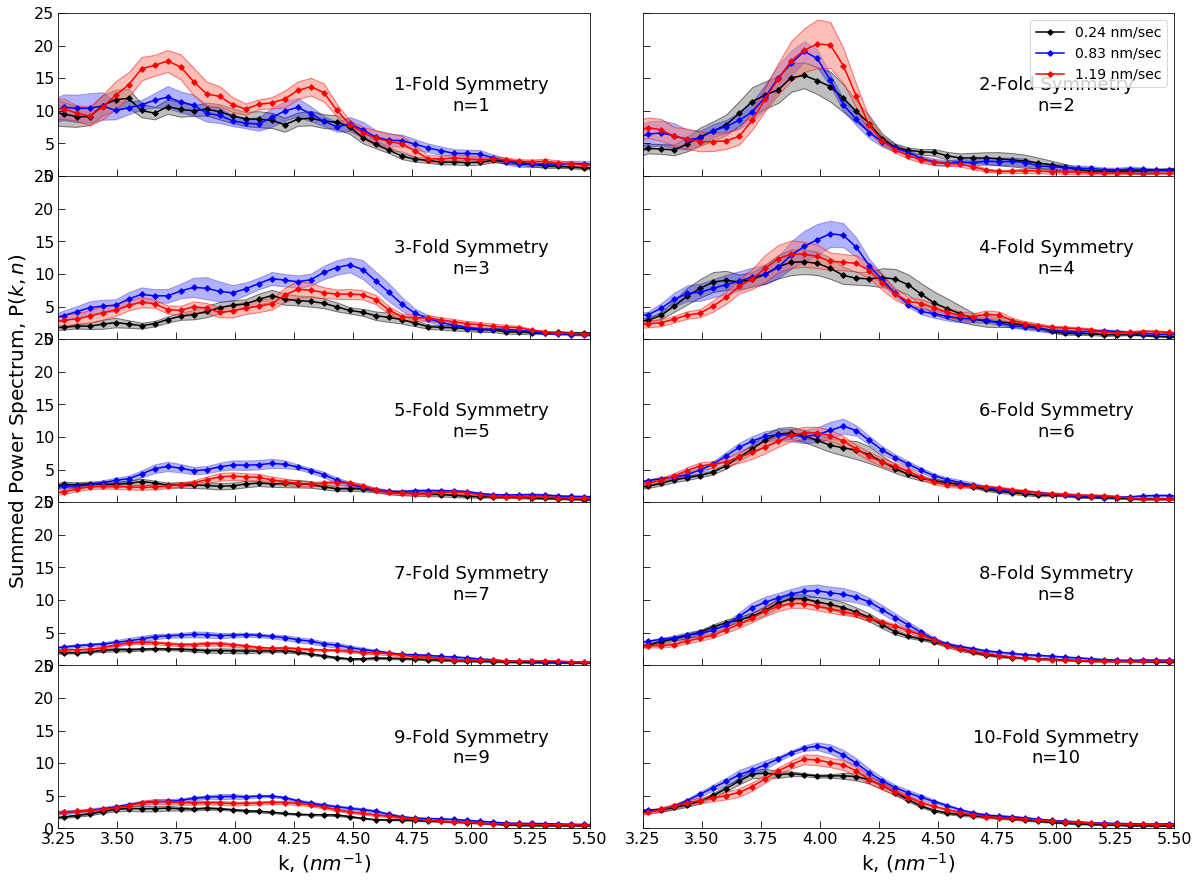

In [14]:
fig, axs = plt.subplots(5,2, figsize=(20,15),sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    n = i+1
    plot_subplot(ax,n,mean24.isig[n,3.0:],std24.isig[n,3.0:],mean83.isig[n,3.0:],
                 std83.isig[n,3.0:], mean119.isig[n,3.0:], std119.isig[n,3.0:])
axs[0,1].legend(fontsize=14)
fig.subplots_adjust(hspace=0,wspace=0.1)
axs[2,0].set_ylabel("Summed Power Spectrum, P($k,n$)",fontsize=20)

Once all of the spectra are loaded, the summed power spectrum is calculated.  This is taking the average of the power spectrum of the summed Angular Correlation.

$C_{sum}(\phi) =\sum_n {\frac{<I(\theta)I(\theta+\phi)>_\theta - <I(\theta)>^2_\theta}{<I(\theta)>^2_\theta}}$

The power Spectrum is just taking the FFT of the Angular correlation. 

If we think about what each of these intensites mean, the angular correlation is a measure of the deviation from the varience in some pattern. That is to say it is the signal that stands out above the background.  If all of the varience is attributed to some periodic signal than the resulting correlation will be equal to 1 or -1 at a max or a min.  In the case where the entire signal is noise then the correlation will tend twoards zero. 

With the power spectrum, the intensity is based on the intensity in the angular correlation. Really what we are measuring is the deviation from the variance at some interior angle $\phi$.  This also means as the number of strucutres increases, the total intensity can decrease as the varience of rises

**Looking at the pattern by pattern Variance**

This is a measure of the variance in the individual patterns which means gives us an idea of how each of the patterns is normalized.

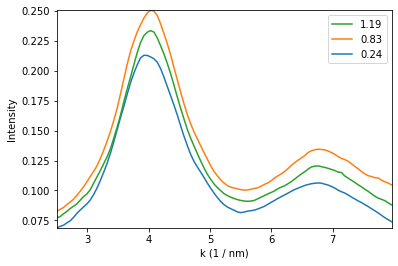

In [15]:
# Looking at the average variance for the different films (Interpattern variance)
hs.plot.plot_spectra([ang24.isig[0,:].mean(),
                      ang83.isig[0,:].mean(),
                      ang119.isig[0,:].mean()],
                     legend=["0.24","0.83","1.19"])

**Normalizing** 

This section deals with normalizing the data with respect to the total intensity in the Fourier domain.  The reason for this is to equalize everything based on the total intensity in the Fourier domain.  This is basically accounting for the fact that there are different Signal to noise ratio's for the different samples as a result of thickness, number of clusters or slight errors still in the ellipticity of the pattern. 

In [16]:
(pow24/pow24.sum(axis=(1,2))).mean(axis=0)

<Signal2D, title: , dimensions: (|720, 101)>

In [17]:
mean24 = (pow24/pow24.sum(axis=(1,2))).mean(axis=0)
mean83 = (pow83/pow83.sum(axis=(1,2))).mean(axis=0)
mean119 = (pow119/pow119.sum(axis=(1,2))).mean(axis=0)
std24 = (pow24/pow24.sum(axis=(1,2))).std(axis=0)/np.sqrt(10)
std83 = (pow83/pow83.sum(axis=(1,2))).std(axis=0)/np.sqrt(10)
std119 = (pow119/pow119.sum(axis=(1,2))).std(axis=0)/np.sqrt(10)

Text(0, 0.5, 'Normalized Power Spectrum, P($k,n$)')

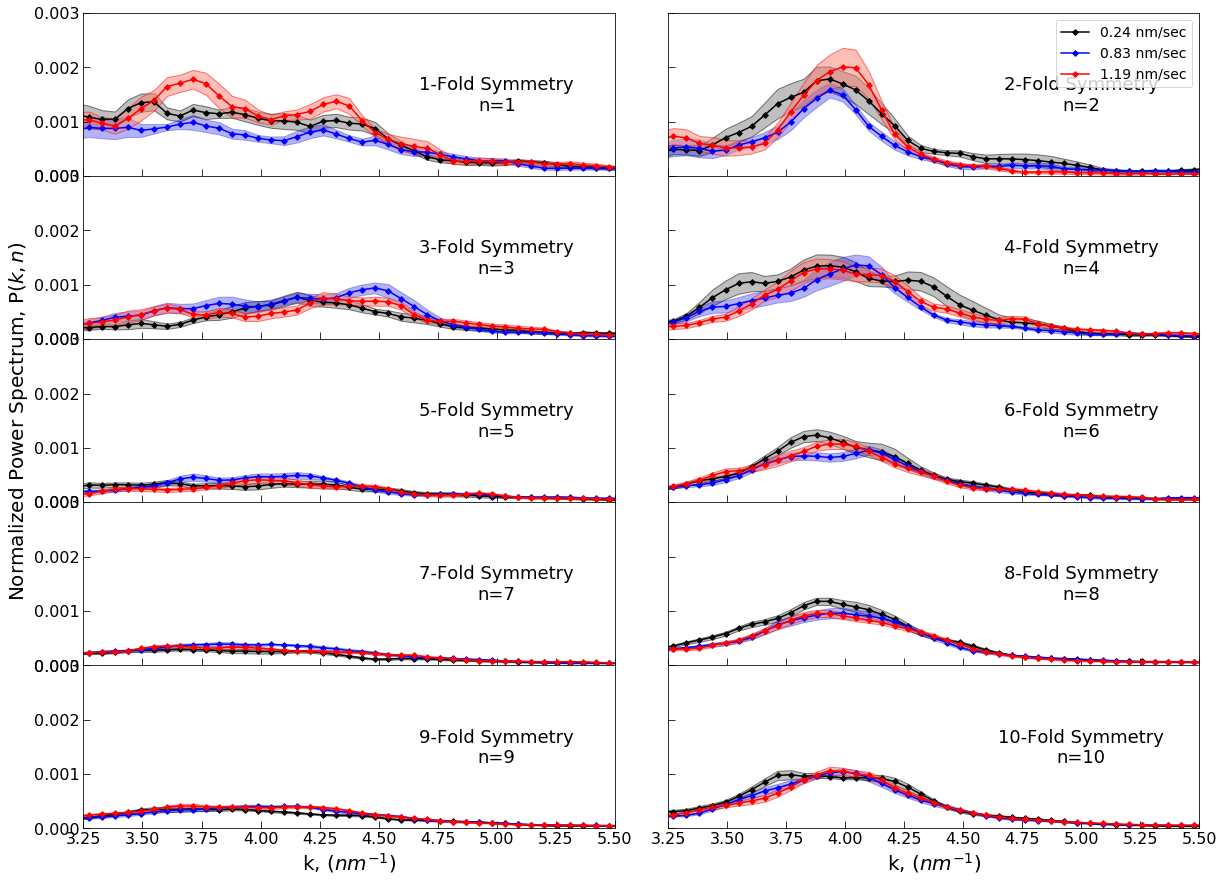

In [18]:
fig, axs = plt.subplots(5,2, figsize=(20,15),sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    n = i+1
    plot_subplot(ax,n,mean24.isig[n,3.0:],std24.isig[n,3.0:],mean83.isig[n,3.0:],
                 std83.isig[n,3.0:], mean119.isig[n,3.0:], std119.isig[n,3.0:],ylim=.003)
axs[0,1].legend(fontsize=14)
fig.subplots_adjust(hspace=0,wspace=0.1)
axs[2,0].set_ylabel("Normalized Power Spectrum, P($k,n$)",fontsize=20)

**Efffect of Normalization:**

The graph above shows the angular correlations after being normalized vs the total intensity in the power spectrum.  This normalization divides each point by the total power of the spectrum across all fouier coeffificents.

This effectively give the percentage contribution to the varience by each of the different symmeteries. If we look at the raw intensities of the datasets we can see why this might be important.

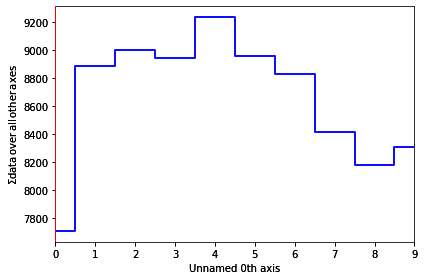

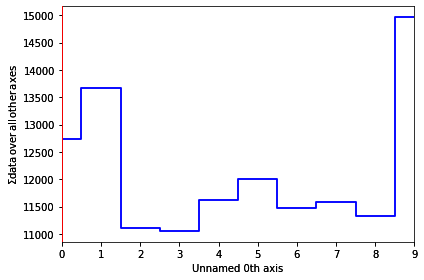

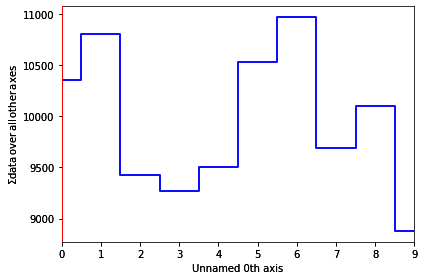

In [19]:
pow24.sum(axis=(1,2)).plot()
pow83.sum(axis=(1,2)).plot()
pow119.sum(axis=(1,2)).plot()

Looking at just the two-fold symmetries in the power spectrum. This is a good test to see if there is still uncorrected ellipticity in the spectrum.  This would show up as much large 2-fold symmetries and much lower even fold symmetries higher than 2.  A better method for correcting the distortion in the patterns might be to maxmize the higher order symetries through a elliptical transformation. 

**Figures for Paper**

Below are the figures for the CuZrAl Paper and the code used to produce the figures

In [20]:
import pandas as pd

In [22]:
variance = pd.read_csv("CuZrAl_DepositionRate/Variance.csv",delimiter=",")

In [37]:
def get_range(signal):
    x = signal.axes_manager.signal_axes[0]
    return(np.linspace(x.offset,x.offset+x.size*x.scale,x.size))/10

In [48]:
def plot_subplot(axis, n, twenty,twentyerr, eighty,eightyerr, hundred, hundrederr,ylim=25, xlim=.55):
    x = get_range(twenty)
    axis.plot(x, twenty.data, c="black", marker='D',markersize=4,label="0.24 nm/sec")
    axis.fill_between(x, twenty.data-twentyerr.data, twenty.data+twentyerr.data,facecolor="grey", alpha=.5,linewidth=1,edgecolor='black')
    x = get_range(eighty)
    axis.plot(x, eighty.data,marker='D', c="blue",markersize=4,label="0.83 nm/sec")
    axis.fill_between(x, eighty.data-eightyerr.data, eighty.data+eightyerr.data,facecolor="blue", alpha=.3,linewidth=1,edgecolor='navy')
    x = get_range(hundred)
    axis.plot(x, hundred.data, c="red", marker='D',markersize=4,label="1.19 nm/sec")
    axis.fill_between(x, hundred.data-hundrederr.data, hundred.data+hundrederr.data,facecolor="salmon", alpha=.5,linewidth=1,edgecolor='red')
    axis.set_xlim(0.325,xlim)
    axis.set_ylim(0.0000000001,ylim)
    axis.tick_params(direction="in", length=7,labelsize=16)
    axis.text(.50,ylim/2.5,s=str(n)+"-Fold Symmetry\nn="+str(n),fontsize=18,horizontalalignment='center')
    axis.set_xlabel("k, ($\AA^{-1}$)",fontsize=20)

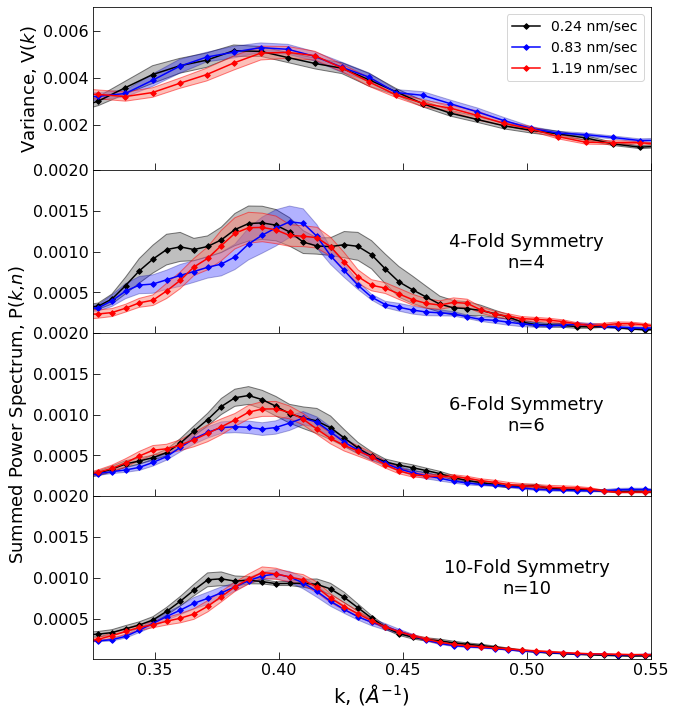

In [49]:
fig, axs = plt.subplots(4,1, figsize=(10,12),sharex=True)
axs[0].plot(variance.iloc[:,0], variance.iloc[:,5],label="0.24 nm/sec", c="black", marker='D',markersize=4)
axs[0].plot(variance.iloc[:,0], variance.iloc[:,3],label="0.83 nm/sec", c="blue", marker='D',markersize=4)
axs[0].plot(variance.iloc[:,0], variance.iloc[:,1],label="1.19 nm/sec", c="red", marker='D',markersize=4)
axs[0].fill_between(variance.iloc[:,0], variance.iloc[:,5]-variance.iloc[:,6], variance.iloc[:,5]+variance.iloc[:,6],facecolor="grey", alpha=.5,linewidth=1,edgecolor='black')
axs[0].fill_between(variance.iloc[:,0], variance.iloc[:,3]-variance.iloc[:,4], variance.iloc[:,3]+variance.iloc[:,4],facecolor="blue", alpha=.3,linewidth=1,edgecolor='navy')
axs[0].fill_between(variance.iloc[:,0], variance.iloc[:,1]-variance.iloc[:,2], variance.iloc[:,1]+variance.iloc[:,2],facecolor="salmon", alpha=.5,linewidth=1,edgecolor='red')
axs[0].set_xlim(0.325,0.55)
axs[0].set_ylim(0.0001,.007)
axs[0].set_ylabel("Variance, V($k$)",fontsize=18)
axs[0].tick_params(direction="in", length=7,labelsize=16)
n_list=[4,6,10]
for ax, n in zip(axs[1:], n_list):
    plot_subplot(ax,n,mean24.isig[n,3.0:],std24.isig[n,3.0:],mean83.isig[n,3.0:],
                 std83.isig[n,3.0:], mean119.isig[n,3.0:], std119.isig[n,3.0:],ylim=.002)
axs[3].set_xlabel("k, ($\AA^{-1}$)",fontsize=20)
fig.subplots_adjust(hspace=0)
axs[0].legend(fontsize=14)
axs[2].set_ylabel("Summed Power Spectrum, P($k$,$n$)",fontsize=18)
plt.show()

Text(0, 0.5, 'Summed Power Spectrum, P($k,n$)')

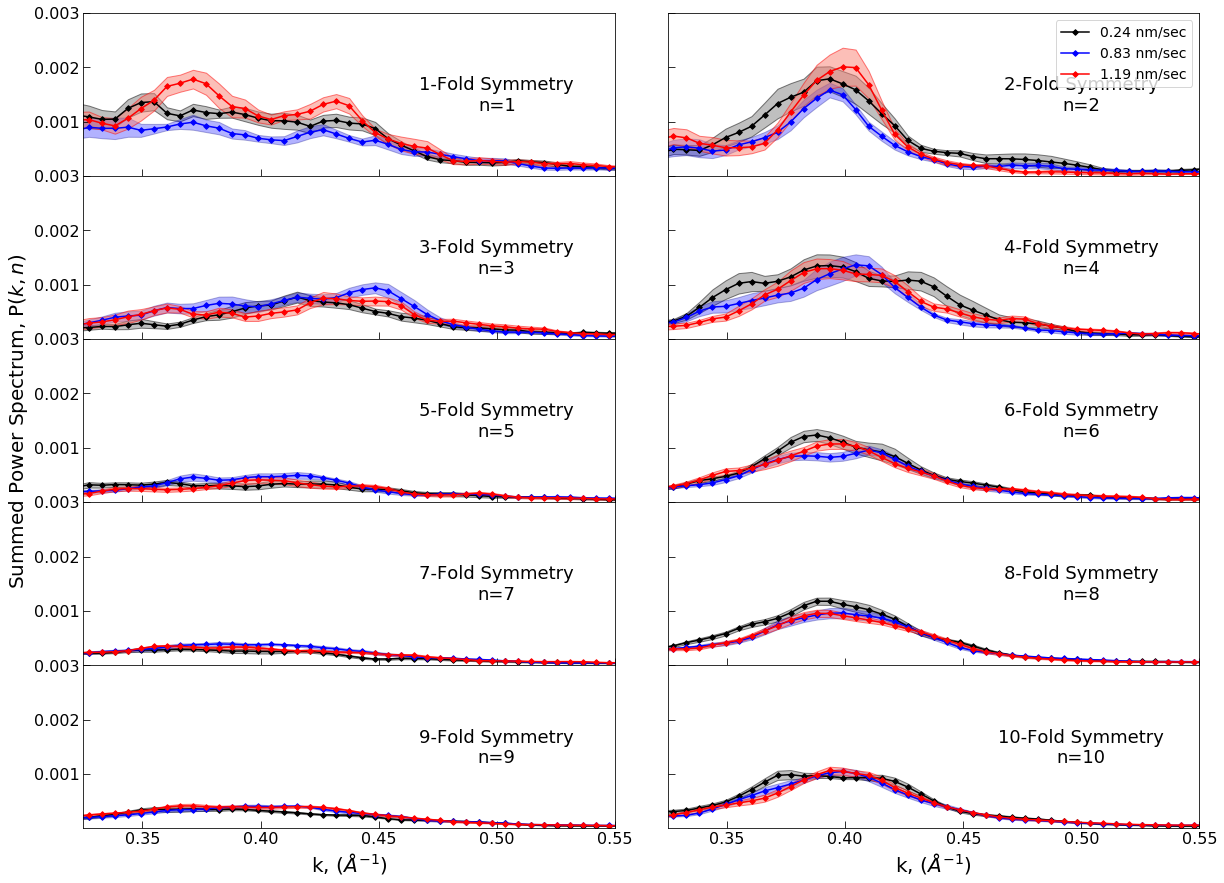

In [50]:
fig, axs = plt.subplots(5,2, figsize=(20,15),sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
    n = i+1
    plot_subplot(ax,n,mean24.isig[n,3.0:],std24.isig[n,3.0:],mean83.isig[n,3.0:],
                 std83.isig[n,3.0:], mean119.isig[n,3.0:], std119.isig[n,3.0:],ylim=.003)
axs[0,1].legend(fontsize=14)
fig.subplots_adjust(hspace=0,wspace=0.1)
axs[2,0].set_ylabel("Summed Power Spectrum, P($k,n$)",fontsize=20)